# Метод максимального правдоподобия

## Оценка одномерной выборки

In [ ]:
import numpy as np 

size = 10000 # Number of observations
mu = 3 # Mean
sigma = 2 # Standard deviation 
sample = # ༼ つ ◕_◕ ༽つ

### Явное решение

In [ ]:
mu_hat = # ༼ つ ◕_◕ ༽つ
sigma_hat = # ༼ つ ◕_◕ ༽つ

print(f"Estimated mu: {mu_hat}")
print(f"Estimated sigma: {sigma_hat}")

### Численное решение

In [ ]:
    
def log_likelihood_factory(sample: np.ndarray):

    def log_likelihood(params):
        mu, sigma = params

        lik =  # ༼ つ ◕_◕ ༽つ
        
        # For maximization
        return  - lik
    
    return log_likelihood


def log_likelihood_grad_factory(sample: np.ndarray):

    def log_likelihood_grad(params):
        mu, sigma = params

        mu_part =  # ༼ つ ◕_◕ ༽つ
        sigma_part = # ༼ つ ◕_◕ ༽つ
        
        # For maximization
        return - np.array([mu_part, sigma_part])
    
    return log_likelihood_grad

In [ ]:
from scipy.optimize import minimize

x0 = np.random.uniform(size=2)
res = minimize(
    log_likelihood_factory(sample), 
    x0,
    jac=log_likelihood_grad_factory(sample)
)

In [ ]:
res

## Марковская цепь

**Марковская цепь** — это математическая модель стохастического процесса, в которой вероятность перехода в следующее состояние зависит только от текущего состояния и не зависит от предыдущих состояний. Такая характеристика называется *свойством Маркова* или свойством отсутствия памяти.

Формально, последовательность случайных переменных $( X_1, X_2, \ldots, X_n )$ образует Марковскую цепь, если выполняется следующее условие:

$$
P(X_{n+1} = x \mid X_1 = x_1, X_2 = x_2, \ldots, X_n = x_n) = P(X_{n+1} = x \mid X_n = x_n)
$$

где $ P $ обозначает вероятность, а $ X_n $ — состояние в момент времени $ n $.



In [2]:
from tqdm import trange
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go


class MarkovChain:
    def __init__(self, nodes: list[int], transition_matrix: np.ndarray):
        """
        Initializes a Markov chain with the given nodes and transition matrix.

        Args:
            nodes (list[int]): List of node identifiers.
            transition_matrix (np.ndarray): Square matrix representing transition probabilities between nodes.
        
        Raises:
            AssertionError: If the dimensions of the transition matrix do not match the number of nodes.
        """

        # ༼ つ ◕_◕ ༽つ

    def generate_trajectory(self, length: int) -> np.ndarray:
        """
        Generates a trajectory of the Markov chain starting from a random node.

        Args:
            length (int): Length of the desired trajectory.

        Returns:
            np.ndarray: Array representing the sequence of nodes in the trajectory.
        """
        
        # ༼ つ ◕_◕ ༽つ

    def plot(self):
        """
        Plots the Markov chain graph with nodes and edges. The edge labels represent transition probabilities.
        """
        # Position the nodes using a layout
        pos = nx.spring_layout(self.graph)

        # Draw the graph
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', arrows=True, connectionstyle='arc3,rad=0.2')

        # Draw edge labels (probabilities)
        edge_labels = nx.get_edge_attributes(self.graph, 'label')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=10)

        # Show the plot
        plt.show()

    def plot_trajectory(self, trajectory: np.ndarray):
        """
        Plots the trajectory of the Markov chain over time, using Plotly for animation.

        Args:
            trajectory (np.ndarray): Array representing the sequence of nodes in the trajectory.
        """
        pos = nx.spring_layout(self.graph)
        edge_x, edge_y = [], []
        for edge in self.graph.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])

        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=1, color='#888'),
            hoverinfo='none',
            mode='lines')

        node_x, node_y = zip(*[pos[n] for n in self.graph.nodes()])
        node_trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers+text',
            text=[str(node) for node in self.graph.nodes()],
            textposition='top center',
            hoverinfo='text',
            marker=dict(size=20, color='lightblue'))

        frames = []
        for i in range(len(trajectory)):
            frame_node_trace = go.Scatter(
                x=node_x, y=node_y,
                mode='markers+text',
                text=[str(node) for node in self.graph.nodes()],
                textposition='top center',
                hoverinfo='text',
                marker=dict(size=[30 if n == trajectory[i] else 20 for n in self.graph.nodes()],
                            color=['red' if n == trajectory[i] else 'lightblue' for n in self.graph.nodes()]))
            frames.append(go.Frame(data=[edge_trace, frame_node_trace]))

        layout = go.Layout(
            showlegend=False,
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            template='plotly_white',
            updatemenus=[{
                "buttons": [{
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, 
                                    "fromcurrent": True, "transition": {"duration": 300}}],
                    "label": "Play",
                    "method": "animate"}],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.1,
                "xanchor": "right",
                "y": 0,
                "yanchor": "top"}])

        fig = go.Figure(data=[edge_trace, node_trace], frames=frames, layout=layout)
        fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
        fig.show()


In [3]:
n_nodes = 5

def generate_markov_chain(n_nodes: int) -> MarkovChain:
    """
    Generates a random Markov chain with a specified number of nodes.

    Args:
        n_nodes (int): The number of nodes in the Markov chain.

    Returns:
        MarkovChain: An instance of the MarkovChain class initialized with the generated nodes and transition matrix.

    Notes:
        Each node has a randomly chosen number of neighbors and transition probabilities.
    """
    
    # ༼ つ ◕_◕ ༽つ


    return MarkovChain(nodes=nodes, transition_matrix=transition_matrix)


In [4]:
chain = generate_markov_chain(5)

In [5]:
t = chain.generate_trajectory(10)

100%|██████████| 10/10 [00:00<00:00, 4308.92it/s]


In [6]:
chain.plot_trajectory(t)

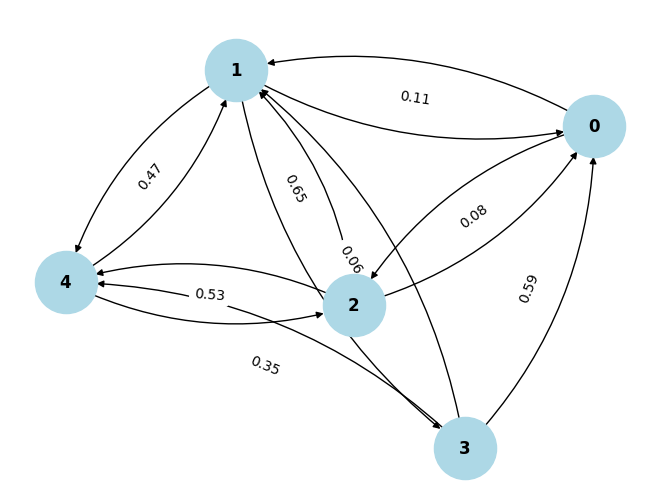

In [7]:
chain.plot()

### Явное решение

In [ ]:
t = chain.generate_trajectory(1000000)

# ༼ つ ◕_◕ ༽つ


In [ ]:
chain.transition_matrix

## MA(1) Процесс

**MA(1) (Модель скользящего среднего первого порядка)** — это тип временного ряда, где текущее значение ряда выражается как линейная комбинация белого шума и его предыдущего значения. MA(1) процесс моделирует зависимость текущего значения от предыдущего шума.

Формально, MA(1) процесс можно записать как:

$$
X_t = \mu + \varepsilon_t + \theta \varepsilon_{t-1}
$$

где:

- $ X_t $ — текущее значение временного ряда.
- $ \mu $ — среднее значение процесса.
- $ \varepsilon_t $ — белый шум (случайная ошибка) в момент времени $ t $, с нулевым средним и постоянной дисперсией.
- $ \theta $ — коэффициент, определяющий влияние предыдущего шума.
- $ \varepsilon_{t-1} $ — белый шум в предыдущий момент времени $ t-1 $.

In [ ]:
from tqdm import trange

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go


class MA1:

    def __init__(self, theta: float, mu:float=0, sigma:float=0):

        """
         Initializes MA(1) process

         Args:

         nodes (list[int]): 
        """

        assert sigma > 0

        self.mu = mu
        self.sigma = sigma
        self.theta = theta

        
    def generate_trajectory(self, length: int, eps_0: float=0) -> np.ndarray:

        """
        Generates trajectory of MA(1) process

        Args:

            length (int): Length of output trajectory

        Returns:
            np.ndarray -- Trajectory of chain nodes
        """
        
        # ༼ つ ◕_◕ ༽つ

        return np.array(trajectory).ravel()
    

    def plot_trajectory(self, trajectory: np.ndarray):
        """
        Plots the trajectory of the MA(1) process using Plotly.

        Args:
            trajectory (np.ndarray): The trajectory of the MA(1) process to plot.
        """
        fig = go.Figure()

        fig.add_trace(go.Scatter(
            x=list(range(len(trajectory))),
            y=trajectory,
            mode='lines+markers',
            name='MA(1) Trajectory'
        ))

        fig.update_layout(
            title='MA(1) Process Trajectory',
            xaxis_title='Time',
            yaxis_title='Value',
            template='plotly_dark'  # Optional: Use any template you like
        )

        fig.show()




In [ ]:
ma = MA1(0.5, 5, 1)

In [ ]:
t = ma.generate_trajectory(200)

In [ ]:
ma.plot_trajectory(t)